## Boston Housing Prices
In this notebook, we explore the Boston Housing Sales.  There are approximately 14 features that potentially contribute to the estimated housing prices.

Our goal is to find the leanest regression model, using the smallest set of features that give us a reasonable fit.  

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Load the data set.  
In this case, the dataset is loaded from sklearn python package and built in making it easy to acquire.  We do a quick conversion to a panda dataframe type as this is an extremely easy and flexible data type that integrates exceptionally well with plotting, statistics and modeling functions.

In [10]:

from sklearn import datasets
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['PRICE'] = pd.Series(boston_data.target)
df_boston.head()
print(df_boston.shape)

(506, 14)


## Note: Ethical Data Warning
There is a warning about the data set and ethical issues.
This is noted and respected.  Recommend this is send to CSU to evaluate.
There is an alternative dataset recommended by sklearn to replace Boston Housing

First, we like to get a feel for the distribution of the housing prices.
Are they highly skewed to one side or another - are there extreme outliers?
In this case, the data looks pretty normally distributed with a slight high outlier at the upper end.
This is not entirely uncommon for real estate type data, where there is no "upper" end to housing prices.
Seeing very large values as outliers is not necessarily unusual.

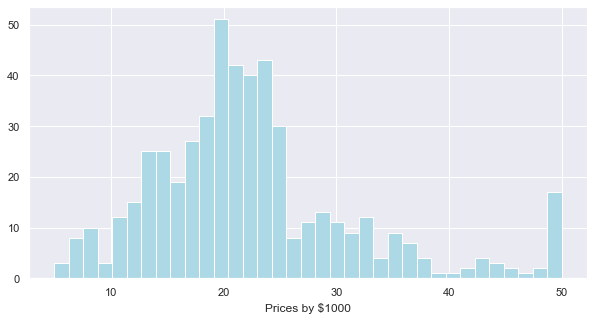

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
plt.hist(df_boston['PRICE'],color ="lightblue", bins=35)
plt.xlabel("Prices by $1000")
plt.show()

## Data Exploration
Now that we have loaded the Boston housing data - we want to see how the individual features are correlated with the median housing price.

The goal here is to get a sense of which features are really important, and which we can possible consider dropping.  

Run a correlatation matrix with all features (Which is a bit large) and we can see quickly what are the main features.

Additionally, this will let us see what features are correlated with other, which will help us see if there are any interactions between features.

If we see interactions between two features clearly, we can consider dropping one since it won't add much to the model, and even cause difficulties.

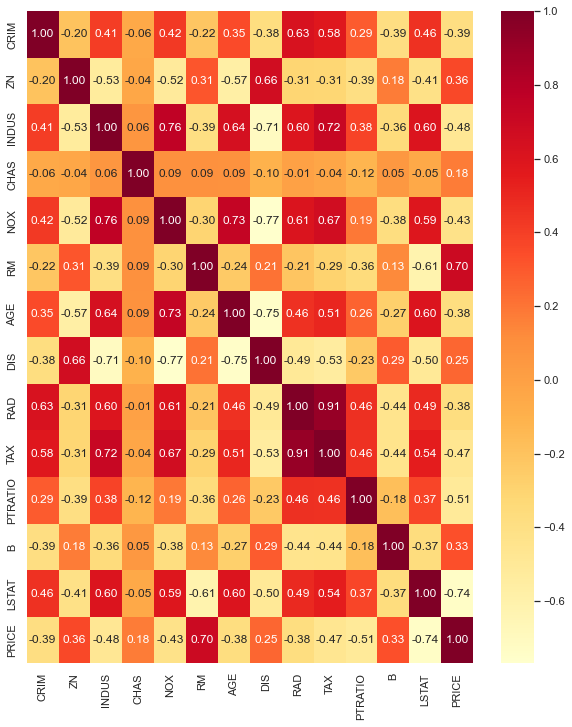

In [12]:
fig, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(df_boston.corr(), cmap='YlOrRd', annot=True, fmt=".2f")
plt.show()

## Feature Selection
From the heat map, we can pick somewhat arbitrarily the features that correlate over 0.5 in magnitude.
This gives us RM, PTRATIO, LSTAT as over 0.5

INDUS was just slightly below at -0.48 and we probably would have put this in as well.  However, since LSTAT and INDUS had some multicolinearity at 0.6 - we ultimately decided to drop INDUS guessing it might cause more harm than good.  We could be wrong on this.

Our goal here is to create a very lean model, so we are keeping this very small and seeing how a smaller model will perform.


## Feature inspection
Next, we look at the correlated features and how they relate to the price, and to one another.
In this case, we see that LSTAT and RM have a noticable correlation with the housing prices.
PTRATIO does not seem to show that strong a correlation, but this is not surprising as it was onl -0.51 correlation coefficient

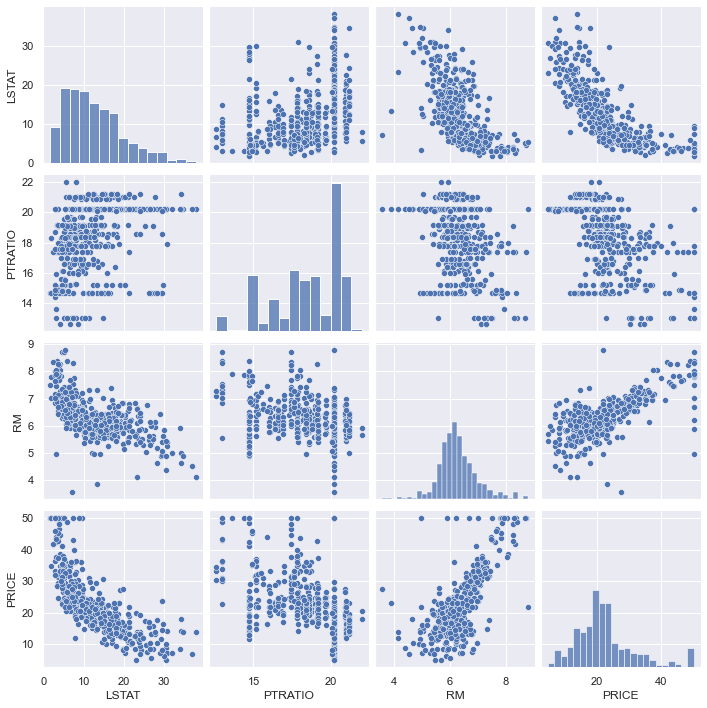

In [13]:

df_boston_lean = df_boston[['LSTAT', 'PTRATIO', 'RM', 'PRICE']]
sns.pairplot(df_boston_lean)

## Log Transformation
When looking at the individual features, we noticed the LSTAT and PTRATIO look a little skewed, so we want to do a quick log transformation and see if that normalizes the data a bit.  Otherwise, the data has more of a log fit, which is a nonlinear regression problem.  At this point, we would like to keep the data in a linear fit.

### Multicolinearity
After closer inspection (something we missed earlier) is that LSTAT and RM are a bit correlated.  They don't appear entirely independent.  This is something to keep in mind.  If we look back at the correlation matrix, there is about a -0.6 correlation coefficient in RM-LSTAT.  A bit higher than we would like to see.

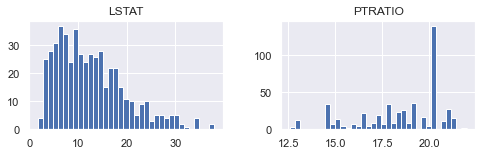

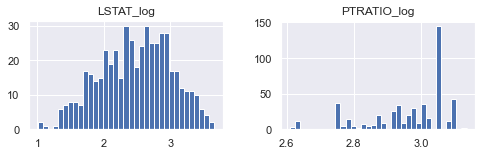

In [14]:
df_boston_lean = df_boston[['LSTAT', 'PTRATIO', 'RM', 'PRICE']]
X=df_boston_lean.iloc[:,:-1] 
y=df_boston_lean[['PRICE']]

X['LSTAT_log'] = np.log1p(X['LSTAT'])
X['PTRATIO_log'] = np.log1p(X['PTRATIO'])

Xlog = X[['LSTAT_log', 'PTRATIO_log', 'RM']]
X = X[['LSTAT', 'PTRATIO', 'RM']]

X[['LSTAT', 'PTRATIO']].hist(bins=35, figsize=(8,2))
plt.show()

Xlog[['LSTAT_log', 'PTRATIO_log']].hist(bins=35, figsize=(8,2))
plt.show()

## Normalize and Train
The LSTAT and PTRATIO columns look "more" normalized.  Especially the LSTAT column.
The PTRatio does not seem to have much change with log transformation.  We can try both and see if there is any difference in the outcome.

Now, we want to transform the data now to standard 0,1 data sets.  This is done to avoid one feature over dominating the other features with data that has a much larger scale.  By scaling all data as standard data with 0 mean and standard deviation of 1, they all equally contribute.

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test)
print('Mean Squared Error is ',mean_absolute_error(pred,y_test))
print('R Squared is ',model.score(X_test_scaled, y_test))


Mean Squared Error is  68.54820143036389
R Squared is  0.7535315866632102


In [25]:
X_train,X_test,y_train,y_test=train_test_split(Xlog,y,test_size=0.2,random_state=3)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test)
print('Mean Squared Error is ',mean_absolute_error(pred,y_test))
print('R Squared is ',model.score(X_test_scaled, y_test))

m = model.coef_[0]
b = model.intercept_
print(' y = {0} * x + {1} * x + {2} * x + {3}'.format(m[0],m[1],m[2], b[0]))

Mean Squared Error is  5.26949316905773
R Squared is  0.8008880328535823


We get two scores, the first is 75% - which is OK, not the best, but OK.  Considering we are using only 3 of the original columns, it is not terrible.
The second score is 80% using the log transformation.  This is pretty decent, again considering we retained just 3 columns.  Not a bad fit.

The Mean Square Error is noticably smaller with the Log fit at 80% accuracy.  The MSE went from 68 to 5 when we introduced the log transformation on the two LSTAT and PTRATIO features.

Overall, our final model of:

Housing Price = 
